In [1]:
import sys
import os
sys.path.append('D:\桌面\pytest\VAE学习及示例')

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from data_prepare import dataset,data_vision
from train import train_AE
from model import AutoEncoder

In [3]:
import argparse
def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--dataset_name', type=str, default='xjtu', help='the name of dataset, xjtu or pu or simu')
    parser.add_argument('--seed', type=int, default=23, help='seed for random')
    parser.add_argument('--data_path', type=str, default=r'D:\桌面\pytest\VAE学习及示例\data', help='the data_path')
    parser.add_argument('--batch_size', type=int, default=64, help='the batch size')
    parser.add_argument('--num_of_see', type=int, default=4, help='the number of pre_1d_see')
    parser.add_argument('--epochs', type=int, default=50, help='the number of pre_1d_see')
    # parser.add_argument('--dataset_name', type=str, default=r'.\result\AAU_Net', help='the output path')
    opt = parser.parse_args(args=[])

    return opt
args = parse_args()  

In [4]:
train_dl, test_dl = dataset.data_prepare_XJTU(args)
a,b = next(iter(test_dl))

tensor([ 2.,  2., 12.,  4.])


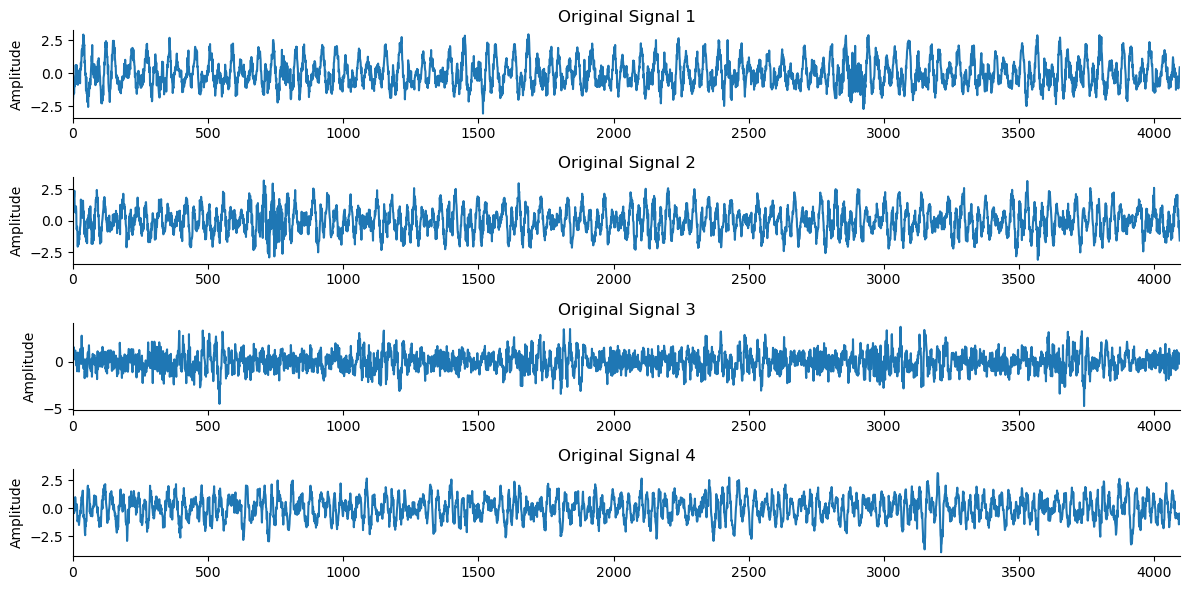

In [5]:
data_vision.pre_1d_see(train_dl, test_dl, args)

In [6]:
model = AutoEncoder().cuda()
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [7]:
train_AE(model, optimizer, train_dl, test_dl, criterion, args.epochs)

Epoch: 1 	Training Loss: 27.906803
Epoch: 2 	Training Loss: 9.176957
Epoch: 3 	Training Loss: 7.825464
Epoch: 4 	Training Loss: 6.846719
Epoch: 5 	Training Loss: 5.887828
Epoch: 6 	Training Loss: 4.977945
Epoch: 7 	Training Loss: 4.365716
Epoch: 8 	Training Loss: 3.932253
Epoch: 9 	Training Loss: 3.652390
Epoch: 10 	Training Loss: 3.447980
Epoch: 11 	Training Loss: 3.262020
Epoch: 12 	Training Loss: 3.086194
Epoch: 13 	Training Loss: 2.921079
Epoch: 14 	Training Loss: 2.772005
Epoch: 15 	Training Loss: 2.639309
Epoch: 16 	Training Loss: 2.527184
Epoch: 17 	Training Loss: 2.429187
Epoch: 18 	Training Loss: 2.348755
Epoch: 19 	Training Loss: 2.279925
Epoch: 20 	Training Loss: 2.224392
Epoch: 21 	Training Loss: 2.174959
Epoch: 22 	Training Loss: 2.132793
Epoch: 23 	Training Loss: 2.094244
Epoch: 24 	Training Loss: 2.056937
Epoch: 25 	Training Loss: 2.024852
Epoch: 26 	Training Loss: 1.993669
Epoch: 27 	Training Loss: 1.968810
Epoch: 28 	Training Loss: 1.944048
Epoch: 29 	Training Loss: 1.

In [11]:
# torch.save(model.state_dict(), 'model_1d.pth')
# model.load_state_dict(torch.load('model_1d.pth'))

<All keys matched successfully>

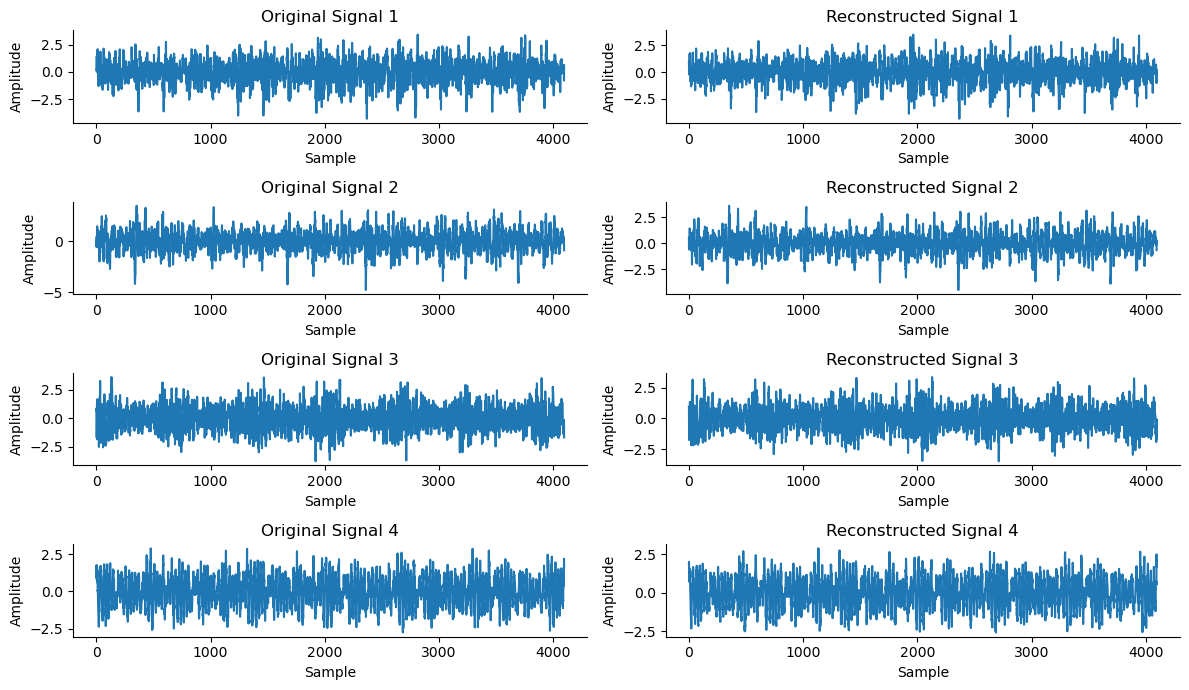

In [8]:
data_vision.after_1d_see(model, test_dl, args)